In [4]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
from library.experiments import *
%matplotlib inline
SEED = 23191

## optimise one dimension function

In [8]:
ak_1d = ackley(dim=1) 

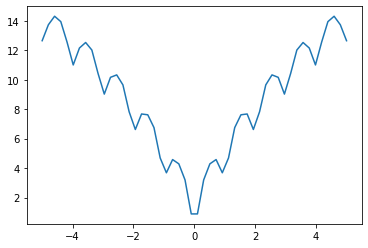

In [20]:
ak_1d.visualise1d(lim=5, n=50)

### line search 

In [57]:
ls = line_search(dim=1)
x0 = np.array([-12.34232])
optmizerParas = {'x0': x0,
         'alpha': 10,
         'beta': 0.19, 
         'max_iter': 1000,
         'tol': 1e-5,              
         'verbose': True,
         'record': False}
ls.set_parameters(optmizerParas)
ls.optimise(ak_1d)


*******starting optimisation from intitial point:  [-12.34232]


(array([-3.98306771]), 10.998262102599446, {'status': None, 'evals': 25})

remark:

large alpha(step size), little beta(threshold) is beneficial to search more globally

### adam

In [125]:
ad = adam(dim=1)
x0 = np.array([12.34232])
optmizerParas = {'x0': x0,
         'alpha': 1.3,
         'beta_1': 0.99, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 1000,
         'tol': 1e-4,              
         'verbose': True,
         'record': False}
ad.set_parameters(optmizerParas)
ad.optimise(ak_1d)



*******starting optimisation from intitial point:  [12.34232]


(array([-0.01528442]), 0.07354080047177947, {'status': None, 'evals': 1000})

### cma

In [105]:
cma = cma_es(dim=1)
x0 = np.array([12.34232])
paras = {'x0': x0,
         'std': np.ones((1,)) * 3, 
         'tol': 1e-5, 
         'adjust_func': do_nothing(), 
         'record': False, 
         'verbose': True}
cma.set_parameters(paras)
cma.optimise(ak_1d)



*******starting optimisation from intitial mean:  [12.34232]
eigenvalue of variance = [0.00754878]
total iterations = 55, total evaluatios = 220
found minimum position = [-2.14504359e-06], found minimum = 8.580419415427087e-06


(array([-2.14504359e-06]),
 8.580419415427087e-06,
 {'val': [],
  'arg': [],
  'x_adjust': [],
  'evals_per_iter': [],
  'mean': [],
  'std': [],
  'status': None,
  'evals': 220})

# find the best setp size of Adam

## ackley

In [7]:
# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
ak = ackley()
exp.set_objective(ak)

# One experiment: setup optimizer
ad = adam()
optmizerParas = {'x0': np.array([13.163,23.2323]),
         'alpha': 0.1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-8, 
         'max_iter': 1000,
         'tol': 1e-5,              
         'verbose': True,
         'record': True}
ad.set_parameters(optmizerParas)
exp.set_optimizer(ad)
exp.do()



*******starting optimisation from intitial point:  [13.163  23.2323]
Result:  local minimum
found minimum: 19.523118600495653, minimum position: [12.99941843 22.99896483], evals: 151


In [ ]:
for i in range(0, 10):
    # One experiment: setup optimizer
    ad = adam()
    optmizerParas = {'x0': np.array([133,23]),
             'alpha': np.power(0.1, i),
             'beta_1': 0.9, 
             'beta_2': 0.999, 
             'epsilon': 1e-8, 
             'max_iter': 1000,
             'tol': 1e-2,              
             'verbose': True,
             'record': True}
    ad.set_parameters(optmizerParas)
    exp.set_optimizer(ad)
    exp.do()

In [ ]:
for i in range(0, 10):
    # One experiment: setup optimizer
    ad = adam()
    optmizerParas = {'x0': np.array([133,23]),
             'alpha': np.power(10, i),
             'beta_1': 0.9, 
             'beta_2': 0.999, 
             'epsilon': 1e-8, 
             'max_iter': 1000,
             'tol': 1e-2,              
             'verbose': True,
             'record': True}
    ad.set_parameters(optmizerParas)
    exp.set_optimizer(ad)
    exp.do()

## bukin

In [ ]:
for i in range(0, 10):
    # One experiment: setup optimizer
    ad = adam()
    optmizerParas = {'x0': np.zeros((2,)),
             'alpha': 0.01* np.power(0.1, i),
             'beta_1': 0.9, 
             'beta_2': 0.999, 
             'epsilon': 1e-8, 
             'max_iter': 1000,
             'tol': 1e-2,              
             'verbose': True,
             'record': False}
    ad.set_parameters(optmizerParas)
    exp.set_optimizer(ad)

    # Multiple experiment: setup one expreiment
    exps_bk_ad.set_single_exp(exp)


    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([-15, -5]),
                 'edge': np.array([30, 10]),
                 'step': 10,
                 'size': 10,
                 'sym': False}
    exps_bk_ad.set_sample_zone(zoneParas)

    %time data_bk_ad = exps_bk_ad.do()